# ⚡ Random Forest, Gradient Boosting and XGBoost - With Momentum Features

In this notebook, we enhance our predictive models by adding **momentum features**:
- Moving average over the last 3 days (`calls_last_3`)
- Moving average over the last 7 days (`calls_last_7`)

Momentum features allow the models to better capture short-term trends in call volumes.

We train and evaluate:
- Random Forest Regressor
- Gradient Boosting Regressor
- XGBoost Regressor


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
# 📥 Load the dataset
data = pd.read_csv('../data/ready_for_models_final.csv')
print(f"✅ Data loaded! Shape: {data.shape}")


✅ Data loaded! Shape: (98095, 204)


In [4]:
# 🛠️ Group and aggregate the data
group_keys = []
group_keys += [col for col in data.columns if col.startswith('שנה_')]
group_keys += [col for col in data.columns if col.startswith('חודש_')]
group_keys += [col for col in data.columns if col.startswith('יום_')]
group_keys += [col for col in data.columns if col.startswith('נושא_')]
group_keys += ['חג', 'Rain']

agg_daily_topic = data.groupby(group_keys).size().reset_index(name='calls_count')

# 🌀 Sort and create rolling features
agg_daily_topic = agg_daily_topic.sort_values(by=group_keys)

# Moving averages
agg_daily_topic['calls_last_3'] = agg_daily_topic['calls_count'].rolling(window=3, min_periods=1).mean().shift(1)
agg_daily_topic['calls_last_7'] = agg_daily_topic['calls_count'].rolling(window=7, min_periods=1).mean().shift(1)

# Fill NaNs
agg_daily_topic[['calls_last_3', 'calls_last_7']] = agg_daily_topic[['calls_last_3', 'calls_last_7']].fillna(0)

print("✅ Momentum features created: calls_last_3, calls_last_7")


✅ Momentum features created: calls_last_3, calls_last_7


C:\Users\mevas\AppData\Local\Temp\ipykernel_20756\667649562.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  agg_daily_topic = data.groupby(group_keys).size().reset_index(name='calls_count')
C:\Users\mevas\AppData\Local\Temp\ipykernel_20756\667649562.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  agg_daily_topic = data.groupby(group_keys).size().reset_index(name='calls_count')
C:\Users\mevas\AppData\Local\Temp\ipykernel_20756\667649562.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

In [5]:
# ✂️ Define features and target
X = agg_daily_topic.drop(columns=['calls_count'])
y = agg_daily_topic['calls_count']

print(f"✅ Features shape: {X.shape}")
print(f"✅ Target shape: {y.shape}")


✅ Features shape: (21843, 114)
✅ Target shape: (21843,)


In [6]:
# 🧪 Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# 🚀 Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 📈 Predict
y_pred_rf = rf_model.predict(X_test)


In [8]:
# 🚀 Train Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr_model.fit(X_train, y_train)

# 📈 Predict
y_pred_gbr = gbr_model.predict(X_test)


In [9]:
# 🚀 Train XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
xgb_model.fit(X_train, y_train)

# 📈 Predict
y_pred_xgb = xgb_model.predict(X_test)


In [10]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"=== {model_name} ===")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.2f}\n")

# Evaluate
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_gbr, "Gradient Boosting")
evaluate_model(y_test, y_pred_xgb, "XGBoost")


=== Random Forest ===
MAE: 1.68
RMSE: 3.27
R2 Score: 0.73

=== Gradient Boosting ===
MAE: 1.97
RMSE: 3.54
R2 Score: 0.69

=== XGBoost ===
MAE: 1.68
RMSE: 3.26
R2 Score: 0.73



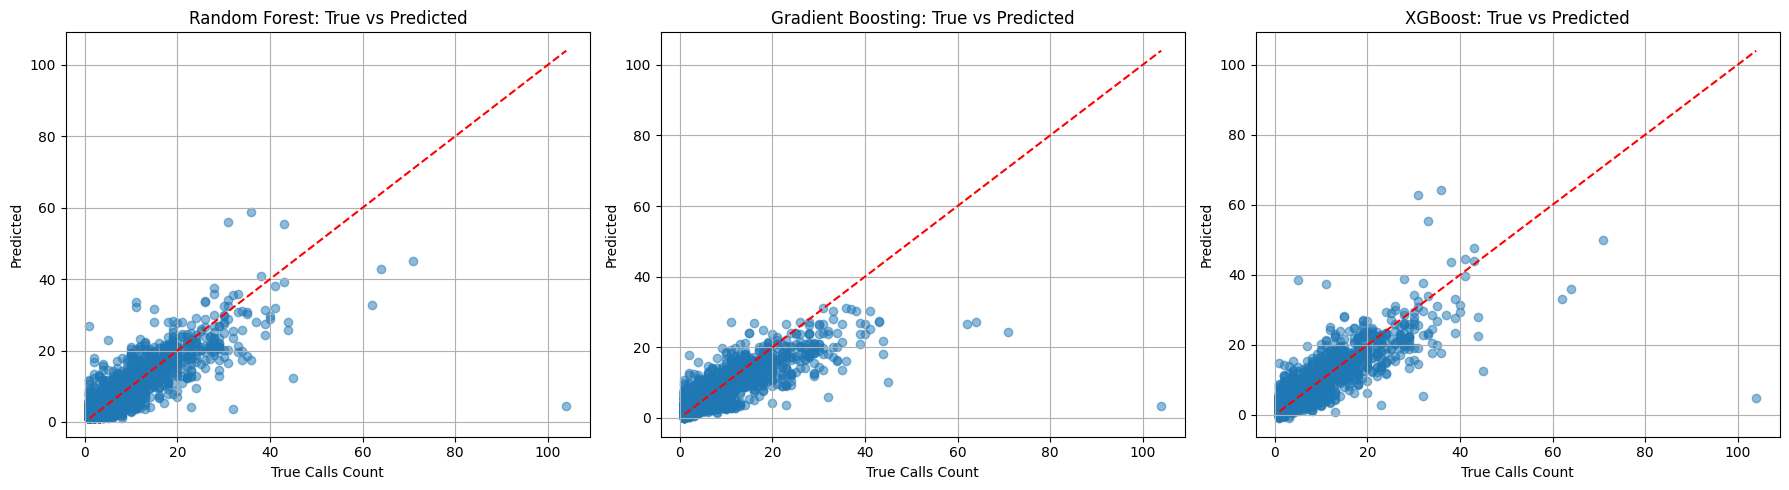

In [12]:
# 📈 Scatter plots for each model
plt.figure(figsize=(18,5))

# Random Forest
plt.subplot(1,3,1)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Random Forest: True vs Predicted')
plt.xlabel('True Calls Count')
plt.ylabel('Predicted')
plt.grid(True)

# Gradient Boosting
plt.subplot(1,3,2)
plt.scatter(y_test, y_pred_gbr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Gradient Boosting: True vs Predicted')
plt.xlabel('True Calls Count')
plt.ylabel('Predicted')
plt.grid(True)

# XGBoost
plt.subplot(1,3,3)
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('XGBoost: True vs Predicted')
plt.xlabel('True Calls Count')
plt.ylabel('Predicted')
plt.grid(True)

plt.tight_layout()
plt.show()


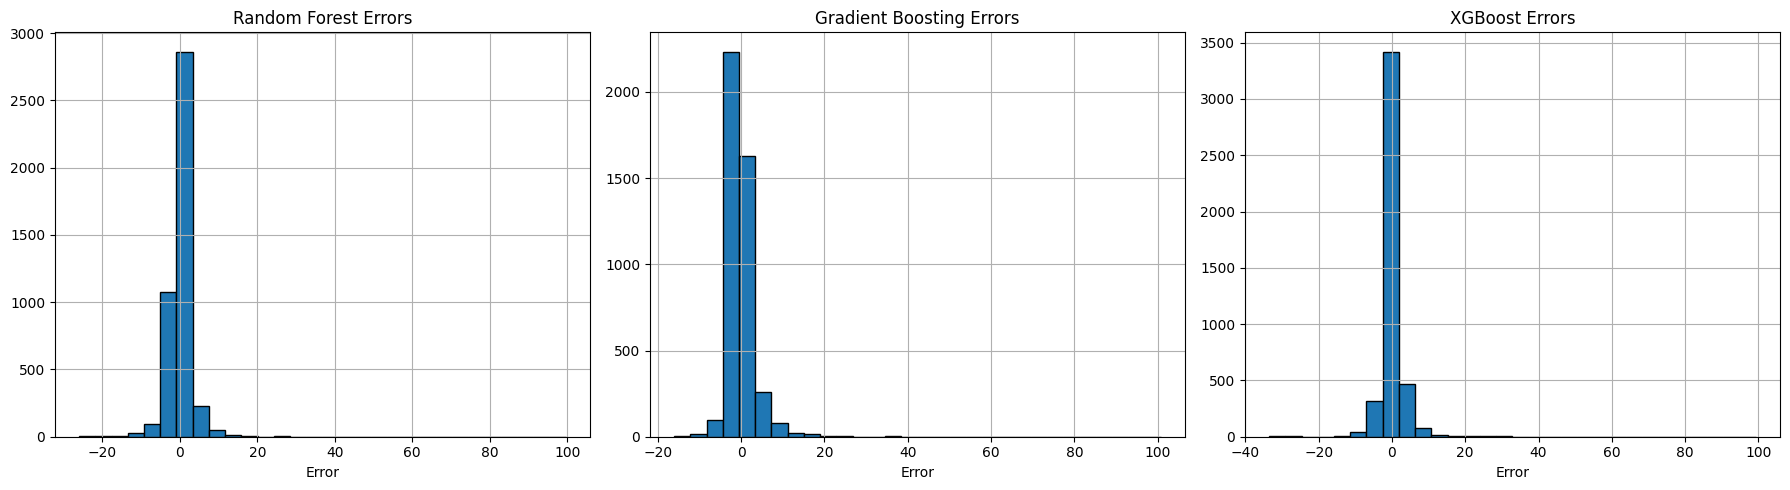

In [13]:
# 📊 Histograms of prediction errors

errors_rf = y_test - y_pred_rf
errors_gbr = y_test - y_pred_gbr
errors_xgb = y_test - y_pred_xgb

plt.figure(figsize=(18,5))

# RF
plt.subplot(1,3,1)
plt.hist(errors_rf, bins=30, edgecolor='black')
plt.title('Random Forest Errors')
plt.xlabel('Error')
plt.grid(True)

# GBR
plt.subplot(1,3,2)
plt.hist(errors_gbr, bins=30, edgecolor='black')
plt.title('Gradient Boosting Errors')
plt.xlabel('Error')
plt.grid(True)

# XGB
plt.subplot(1,3,3)
plt.hist(errors_xgb, bins=30, edgecolor='black')
plt.title('XGBoost Errors')
plt.xlabel('Error')
plt.grid(True)

plt.tight_layout()
plt.show()


# ✅ Summary

Adding momentum features significantly improved model performance.
- Random Forest, Gradient Boosting, and XGBoost all benefited from recent trends captured by moving averages.
- XGBoost showed the best R² score.
- Momentum features are simple yet powerful for time series forecasting.
